In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [3]:
sub.head()

,Employee ID,Burn Rate
0,fffe32003000360033003200,0.16
1,fffe3700360033003500,0.36
2,fffe31003300320037003900,0.49
3,fffe32003400380032003900,0.20
4,fffe31003900340031003600,0.52


In [18]:
train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [5]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [7]:
#getting the counts of each customer
for cols in train.columns:
    print('----------------------------------')
    print(train[cols].value_counts())

----------------------------------
Employee ID
fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: count, Length: 22750, dtype: int64
----------------------------------
Date of Joining
2008-01-06    86
2008-05-21    85
2008-02-04    82
2008-07-16    81
2008-07-13    80
              ..
2008-06-27    44
2008-07-06    44
2008-07-04    43
2008-12-24    43
2008-12-07    39
Name: count, Length: 366, dtype: int64
----------------------------------
Gender
Female    11908
Male      10842
Name: count, dtype: int64
----------------------------------
Company Type
Service    14833
Product     7917
Name: count, dtype: int64
----------------------------------
WFH Setup Available
Yes    12290
No     10460
Name: count, dty

In [8]:
print('Total shape of train',train.shape)

Total shape of train (22750, 9)


In [9]:
print('Total row of train',train.shape[0])
print('Total column of train',train.shape[1])

Total row of train 22750
Total column of train 9


In [10]:
print('Total shape of test',test.shape)
print('Total row of test',test.shape[0])
print('Total column of test',test.shape[1])

Total shape of test (12250, 8)
Total row of test 12250
Total column of test 8


In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: >

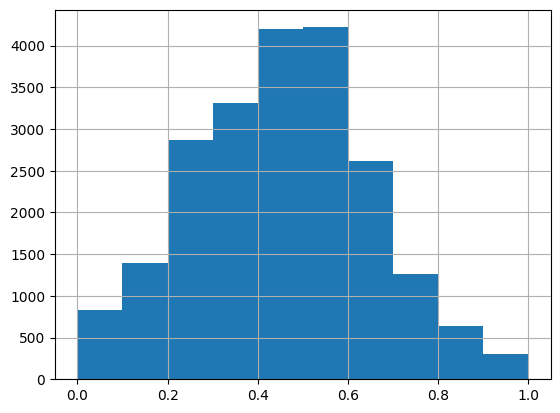

In [14]:
train['Burn Rate'].hist()

In [15]:
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [16]:
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [17]:
test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [19]:
train=train.dropna(subset=['Burn Rate','Mental Fatigue Score','Resource Allocation']).reset_index(drop=True)

In [20]:
print('Total shape of the train', train.shape)
print('Total rows of the train', train.shape[0])
print('Total columns of the train', train.shape[1])

Total shape of the train (18590, 9)
Total rows of the train 18590
Total columns of the train 9


In [21]:
#statistical analysis
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,18590.000000,18590.000000,18590.000000,18590.000000
mean,2.179398,4.486552,5.732173,0.452444
std,1.133148,2.044848,1.920547,0.197848
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [28]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
3,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
4,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29


In [31]:
train = train.reset_index(drop=True)

In [32]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
3,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
4,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29


In [33]:
test_id = test['Employee ID']

In [34]:
#dropping columns
train.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)
test.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)

In [35]:
# ordinal encoding for WFH Setup Available
train['WFH Setup Available'] = train['WFH Setup Available'].map({'Yes':1, 'No':0})
test['WFH Setup Available'] = test['WFH Setup Available'].map({'Yes':1, 'No':0})


# using one hot encoding for no meaningful Ranking
train = pd.get_dummies(data=train,columns=['Gender', 'Company Type'], drop_first=True)
test = pd.get_dummies(data=test,columns=['Gender', 'Company Type'], drop_first=True)

In [36]:
train['Burn Rate'].describe()

count    18590.000000
mean         0.452444
std          0.197848
min          0.000000
25%          0.320000
50%          0.450000
75%          0.590000
max          1.000000
Name: Burn Rate, dtype: float64

In [37]:
train = train[['Mental Fatigue Score','Resource Allocation','Designation','WFH Setup Available',
              'Burn Rate', 'Gender_Male','Company Type_Service']]

In [38]:
test = test[['Mental Fatigue Score','Resource Allocation','Designation','WFH Setup Available',
             'Gender_Male','Company Type_Service']]

# Modelling

In [39]:
X = train.drop('Burn Rate', axis=1)
y = train['Burn Rate']

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss
from sklearn.model_selection import GroupKFold, RepeatedKFold
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, r2_score

errcb=[]
y_pred_totcb=[]
fold= KFold(n_splits=10, shuffle=True, random_state=1)#0#1
i=1
for train_index, test_index in fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m = CatBoostRegressor(eval_metric='R2',subsample=0.7,bagging_temperature=0.9, l2_leaf_reg=2, n_estimators=1500, learning_rate=0.025)
    #CatBoostRegressor(eval_metric='R2',subsample=0.7, l2_leaf_reg=2)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],verbose=100, early_stopping_rounds=100)#,verbose=100)
    preds=m.predict(X_test)
    print("err: ",r2_score(y_test,preds))
    errcb.append(r2_score(y_test,preds))
    p = m.predict(test)
    y_pred_totcb.append(p)

0:	learn: 0.0425554	test: 0.0425554	test1: 0.0422352	best: 0.0422352 (0)	total: 21.3ms	remaining: 32s
100:	learn: 0.9151283	test: 0.9151283	test1: 0.9139517	best: 0.9139517 (100)	total: 1.22s	remaining: 16.9s
200:	learn: 0.9268675	test: 0.9268675	test1: 0.9257619	best: 0.9257619 (200)	total: 2.48s	remaining: 16s
300:	learn: 0.9285053	test: 0.9285053	test1: 0.9271589	best: 0.9271589 (300)	total: 3.59s	remaining: 14.3s
400:	learn: 0.9295564	test: 0.9295564	test1: 0.9278707	best: 0.9278707 (400)	total: 4.78s	remaining: 13.1s
500:	learn: 0.9304012	test: 0.9304012	test1: 0.9283962	best: 0.9283962 (500)	total: 6.09s	remaining: 12.1s
600:	learn: 0.9310264	test: 0.9310264	test1: 0.9286907	best: 0.9287016 (596)	total: 8.08s	remaining: 12.1s
700:	learn: 0.9315234	test: 0.9315234	test1: 0.9289058	best: 0.9289058 (700)	total: 9.94s	remaining: 11.3s
800:	learn: 0.9319277	test: 0.9319277	test1: 0.9290431	best: 0.9290527 (792)	total: 11.8s	remaining: 10.3s
900:	learn: 0.9322806	test: 0.9322806	test1:

700:	learn: 0.9317424	test: 0.9317424	test1: 0.9265179	best: 0.9265179 (700)	total: 10.5s	remaining: 11.9s
800:	learn: 0.9321884	test: 0.9321884	test1: 0.9266843	best: 0.9266867 (799)	total: 11.8s	remaining: 10.3s
900:	learn: 0.9325528	test: 0.9325528	test1: 0.9267548	best: 0.9267551 (891)	total: 13s	remaining: 8.65s
1000:	learn: 0.9328914	test: 0.9328914	test1: 0.9267789	best: 0.9268065 (962)	total: 14.1s	remaining: 7.03s
1100:	learn: 0.9331846	test: 0.9331846	test1: 0.9268358	best: 0.9268429 (1088)	total: 15.2s	remaining: 5.51s
1200:	learn: 0.9334702	test: 0.9334702	test1: 0.9268523	best: 0.9268619 (1172)	total: 16.4s	remaining: 4.08s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9268618787
bestIteration = 1172

Shrink model to first 1173 iterations.
err:  0.9268618783023514
0:	learn: 0.0425487	test: 0.0425487	test1: 0.0419393	best: 0.0419393 (0)	total: 7.2ms	remaining: 10.8s
100:	learn: 0.9148782	test: 0.9148782	test1: 0.9162808	best: 0.9162808 (100)	total: 1.

In [45]:
np.mean(errcb)

0.9291808946603183

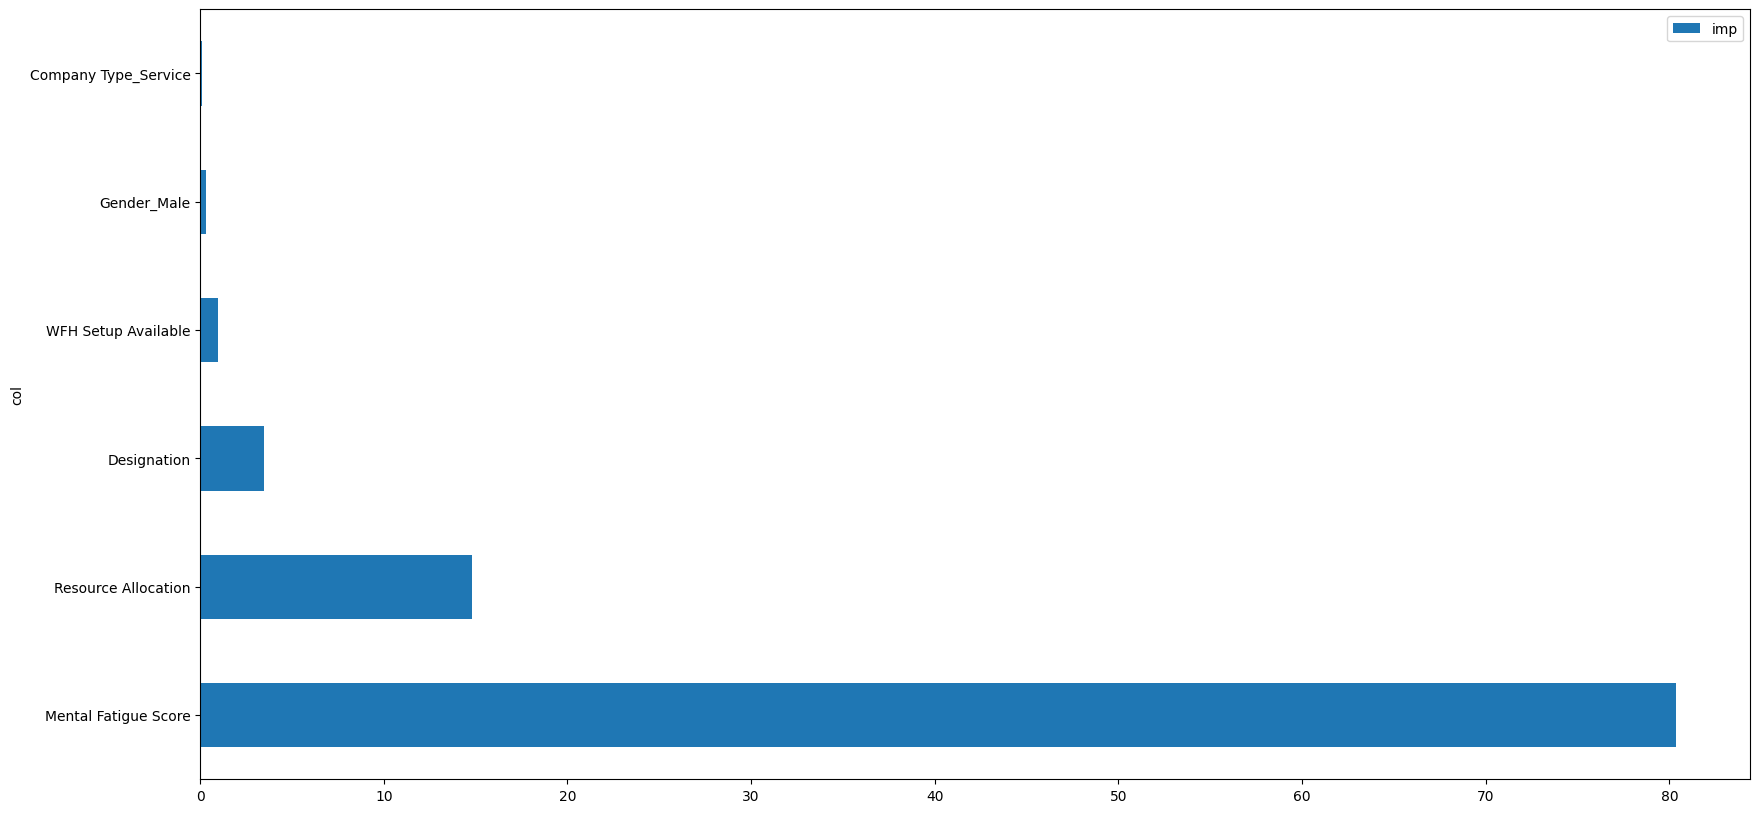

In [46]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=False).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')    

In [47]:
d = {"Employee ID": test_id, 'Burn Rate': abs((np.mean(y_pred_totcb, 0)))}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["Employee ID", 'Burn Rate']]

In [48]:
test_predictions.head()

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.617920
1,fffe31003300310037003800,0.355694
2,fffe33003400380035003900,0.425715
3,fffe3100370039003200,0.378485
4,fffe32003600390036003700,0.531268


In [49]:
test_predictions.to_csv('amitpradhan.csv', index=False)